In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage
from radiosun.client.client import SRSClient, RATANClient
#from radiosun.utils.utils import clipped_zoom
from radiosun.time.timerange import TimeRange
from astropy.io.fits.verify import VerifyWarning
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore', category=VerifyWarning)


## Processing scans from RATAN 600 
In radiosun package sofisticated process of data calibration  was implemented (see link).
In this notebook the example of
data loading and processing is presented with futher saving of processed data.

Preprocessing includes next steps: 
    
    - data loading 
    - fits calibration 
    
Raw data either should be at the disk or can be downloaded from SAO resources. Two example below demonstrated. More information about process of data calibration see in paper 

In [7]:
ratan_client = RATANClient()
tr = TimeRange('2017-09-03', '2017-09-03')
url = ratan_client.acquire_data(tr)[0]
print(url)

http://spbf.sao.ru/data/ratan/2017/09/20170903_121257_sun+0_out.fits


In [11]:
raw, processed = ratan_client.process_fits_data(url,
                                                save_path=None,
                                                save_with_original=False)

In [12]:
processed

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x1146502e0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x10c53ead0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x10c53f730>, <astropy.io.fits.hdu.image.ImageHDU object at 0x114719ff0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x11471af50>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x114719480>]

In [15]:
CDELT1 = processed[0].header['CDELT1']
CRPIX = processed[0].header['CRPIX1']
FREQ = processed[3].data
bad_freq = np.isin(FREQ, [15.0938, 15.2812, 15.4688, 15.6562, 15.8438, 16.0312, 16.2188, 16.4062])
I = processed[1].data
V = processed[2].data
mask = processed[4].data.astype(bool)
I, V, FREQ = I[~bad_freq], V[~bad_freq], FREQ[~bad_freq]
x = np.linspace(- CRPIX * CDELT1,
                (V.shape[1] - CRPIX) * CDELT1,
                num=V.shape[1]
                )

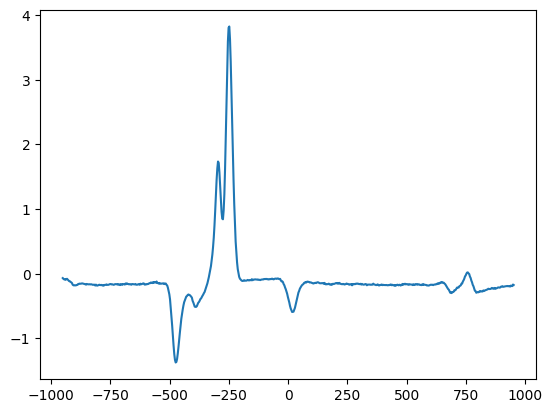

In [17]:
V_masked = np.sum(V, axis=0)[mask]
x_masked = x[mask]
plt.plot(x_masked, V_masked)

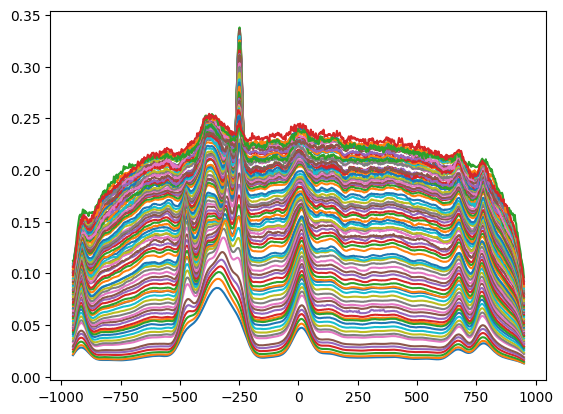

In [23]:
plt.plot(x_masked, I[:, mask].T);

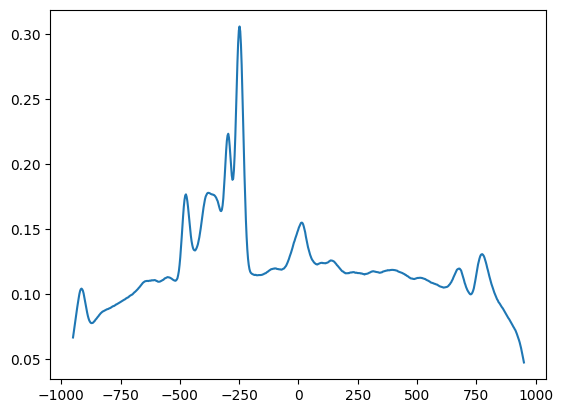

In [33]:
plt.plot(x_masked, I[30, mask].T);
freq = FREQ[30]

# todo matching with SolarDisk